In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp

from statsmodels.formula.api import ols

import statsmodels.api as sm

In [2]:
# One-Way ANOVA
bike_data = pd.read_csv("datasets_130897_312329_day.csv")
bike_data = bike_data[['season','mnth','holiday','workingday',
                       'weathersit','temp','cnt']]
bike_data.sample(5)

,season,mnth,holiday,workingday,weathersit,temp,cnt
389,1,1,0,1,1,0.294167,4270
141,2,5,0,0,1,0.604167,4660
231,3,8,0,0,1,0.697500,5191
372,1,1,0,0,1,0.337500,3425
672,4,11,0,0,2,0.343333,5138


In [3]:
bike_data.shape

(731, 7)

In [4]:
#weather situation(weathersit) affects the number of bike shared
#since more than 2 group of samples go for ANOVA instead of t-test

In [5]:
bike_data.groupby('weathersit')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
2,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


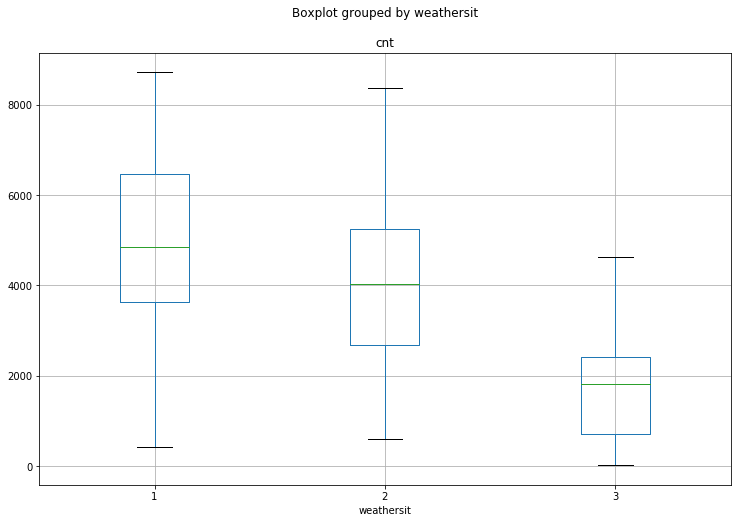

In [6]:
bike_data.boxplot(column='cnt',by='weathersit',figsize=(12,8))

In [7]:
#Null Hypothesis - means are the same
stats.f_oneway(bike_data['cnt'][bike_data['weathersit']==1],
               bike_data['cnt'][bike_data['weathersit']==2],
               bike_data['cnt'][bike_data['weathersit']==3])

# p-value v.small => the difference btw mean btw these 3 samples
# are significant
# the weaather situation does have an impact on the num of bikes shared


F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

In [8]:
# Tukey's Honest Significance Difference
# test to find out which specific group's mean compared with 
# each other are different
# how mean of each individual group compared against other group

In [9]:
from statsmodels.stats.multicomp import MultiComparison
mul_com = MultiComparison(bike_data['cnt'],bike_data['weathersit'])
mul_result = mul_com.tukeyhsd()
print(mul_result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     1      2  -840.9238 0.001  -1181.639  -500.2086   True
     1      3 -3073.5005 0.001 -4038.2706 -2108.7304   True
     2      3 -2232.5766 0.001 -3215.4794 -1249.6738   True
-----------------------------------------------------------


In [10]:
# 2-way ANOVA analysis

In [11]:
rp.summary_cont(bike_data.groupby('weathersit')['cnt'])

,N,Mean,SD,SE,95% Conf.,Interval
weathersit,,,,,,
1,463,4876.7862,1879.4840,87.3470,4705.1395,5048.4329
2,247,4035.8623,1809.1099,115.1109,3809.1337,4262.5910
3,21,1803.2857,1240.2844,270.6523,1238.7150,2367.8564


In [12]:
rp.summary_cont(bike_data.groupby('season')['cnt'])

,N,Mean,SD,SE,95% Conf.,Interval
season,,,,,,
1,181,2604.1326,1399.9421,104.0569,2398.8044,2809.4608
2,184,4992.3315,1695.9772,125.0291,4745.6476,5239.0154
3,188,5644.3032,1459.8004,106.4669,5434.2727,5854.3337
4,178,4728.1629,1699.6153,127.3915,4476.7612,4979.5647


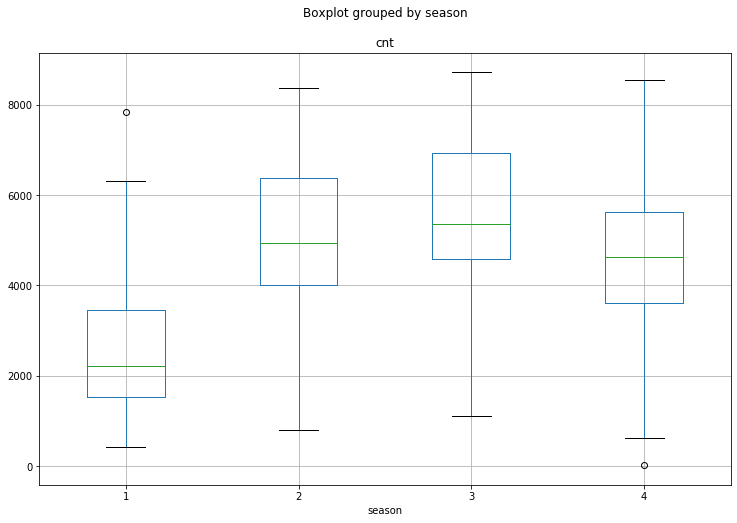

In [13]:
bike_data.boxplot(column='cnt',by='season',figsize=(12,8))

In [14]:
# run regression analysis on data on the counts of bike shared vs the weather situation
# the regression analysis will tell us whether a linear relationship exist btw count and weathersit
# weathersit is a categorical variable therefore, it is dummy encoded (common for regression) using C 
# ordinary least square
model = ols('cnt ~ C(weathersit)',bike_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           3.11e-17
Time:                        22:41:09   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85

In [15]:
# P=0 => each regression coeff. is significant therefore null hypothesis can be rejected

In [16]:
model = ols('cnt ~ C(season)',bike_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           6.72e-67
Time:                        22:41:17   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.

In [17]:
# considers weather and season together but not the interaction btw the two
model1 = ols('cnt ~ C(weathersit)+C(season)',bike_data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     112.0
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           1.13e-87
Time:                        22:41:31   Log-Likelihood:                -6360.4
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     725   BIC:                         1.276e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2931.9780    116

In [20]:
sm.stats.anova_lm(model1)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,63.717757,3.218999e-26
C(season),3.0,9.224636e+08,3.074879e+08,144.250530,2.702818e-73
Residual,725.0,1.545427e+09,2.131624e+06,NaN,NaN


In [21]:
# considers weather and season together and considers interaction btw the two
model2 = ols('cnt ~ C(weathersit)*C(season)',bike_data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     52.85
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           5.25e-85
Time:                        23:36:38   Log-Likelihood:                -6353.1
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     719   BIC:                         1.279e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [22]:
sm.stats.anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,64.469065,1.766520e-26
C(season),3.0,9.224636e+08,3.074879e+08,145.951415,7.347364e-74
C(weathersit):C(season),6.0,3.065076e+07,5.108460e+06,2.424769,2.505746e-02
Residual,719.0,1.514776e+09,2.106782e+06,NaN,NaN
